# **RA1: data 221115**

Dong Gyun Ko <br/>
last updated: november 15, 2022 <br/>

In [1]:
# import libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pylab as plt
import datetime as dt
import os
import warnings
import requests # python 3.6

import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL

import pandas_datareader as pdr
import pandas_datareader.data as web
from pandas_datareader import wb
from pandas_datareader.data import DataReader

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# set the working directory

os.chdir('/content/gdrive/MyDrive/Colab Notebooks/RA1_data')

## **1. data**

### **1.1. python code** <br/>

In [3]:
# import the imf data

df_imf_q_5 = pd.read_csv('df_imf_q_5.csv').sort_values(by=['country', 'quarter']).reset_index(drop=True)

In [4]:
# filter

cond1 = (df_imf_q_5['country'] == 'Euro Area')

df_imf_q_5 = df_imf_q_5.loc[~cond1]

In [5]:
# replace the country

df_imf_q_5 = df_imf_q_5.replace({'country':'Croatia, Rep. of'}, 'Croatia')
df_imf_q_5 = df_imf_q_5.replace({'country':'Czech Rep.'}, 'Czech Republic')
df_imf_q_5 = df_imf_q_5.replace({'country':'Estonia, Rep. of'}, 'Estonia')
df_imf_q_5 = df_imf_q_5.replace({'country':'Korea, Rep. of'}, 'Korea, Rep.')
df_imf_q_5 = df_imf_q_5.replace({'country':'Moldova, Rep. of'}, 'Moldova')
df_imf_q_5 = df_imf_q_5.replace({'country':'Netherlands, The'}, 'Netherlands')
df_imf_q_5 = df_imf_q_5.replace({'country':'Poland, Rep. of'}, 'Poland')
df_imf_q_5 = df_imf_q_5.replace({'country':'Serbia, Rep. of'}, 'Serbia')
df_imf_q_5 = df_imf_q_5.replace({'country':'Slovak Rep.'}, 'Slovak Republic')
df_imf_q_5 = df_imf_q_5.replace({'country':'Slovenia, Rep. of'}, 'Slovenia')
df_imf_q_5 = df_imf_q_5.replace({'country':'T?rkiye, Rep of'}, 'Turkiye')

In [6]:
# merge the wb isocode data

df_wb_isocode = pd.read_csv('df_wb_isocode.csv', encoding='utf-8').rename(columns={'alpha-3':'isocode'})
df_imf_q_5 = df_imf_q_5[['country', 'quarter', 'imf_q_gfcf']]
df_imf_q_5 = pd.merge(df_wb_isocode, df_imf_q_5, how='right', on=['country'])
df_imf_q_5 = df_imf_q_5.sort_values(by=['isocode', 'quarter']).reset_index(drop=True)
df_imf_q_5['quarter'] = pd.to_datetime(df_imf_q_5['quarter'])
df_imf_q_5['quarter'] = df_imf_q_5['quarter'].dt.to_period('Q')

In [7]:
# generate the quarterly temp data

df_q_temp = pd.read_csv('df_q_temp.csv').set_index(['country', 'alpha-3']).transpose()
df_q_temp = pd.DataFrame(df_q_temp.stack(level=['country', 'alpha-3'])).reset_index()
df_q_temp = df_q_temp.rename(columns={'level_0':'quarter', 'alpha-3':'isocode', 0:'value'})
df_q_temp = df_q_temp[['country', 'isocode', 'quarter', 'value']].sort_values(by=['isocode', 'quarter']).reset_index(drop=True)
df_q_temp['quarter'] = pd.to_datetime(df_q_temp['quarter'])
df_q_temp['quarter'] = df_q_temp['quarter'].dt.to_period('Q')

# select the T and N

# select the T
cond_T = (df_q_temp['quarter'].dt.year >= 1950)

df_q_temp = df_q_temp.loc[cond_T]

# select the N
isocode_array = np.array(['ARG', 'AUS', 'AUT', 'BEL', 'BGR', 'BRA', 'CAN', 'CHE', 'CHL', 'COL', 'CYP', 'CZE',
                          'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HKG', 'HRV', 'HUN', 'IDN',
                          'IND', 'IRL', 'ISR', 'ITA', 'JPN', 'KOR', 'LTU', 'LUX', 'LVA', 'MEX', 'MLT', 'NLD',
                          'NOR', 'NZL', 'POL', 'PRT', 'ROU', 'RUS', 'SGP', 'SVK', 'SVN', 'SWE', 'THA', 'TUR',
                          'USA', 'ZAF'])

for i in range(0, isocode_array.shape[0]):
  
    globals()['cond_N{}'.format(i+1)] = (df_q_temp['isocode'] == isocode_array[i])


df_q_temp = df_q_temp.loc[cond_N1 | cond_N2 | cond_N3 | cond_N4 | cond_N5 | cond_N6 | cond_N7 | cond_N8 | cond_N9 | cond_N10 | cond_N11 | cond_N12 | cond_N13 | cond_N14 | cond_N15 | cond_N16 | cond_N17 | cond_N18 | cond_N19 | cond_N20 | cond_N21 | cond_N22 | cond_N23 | cond_N24 | cond_N25 | cond_N26 | cond_N27 | cond_N28 | cond_N29 | cond_N30 | cond_N31 | cond_N32 | cond_N33 | cond_N34 | cond_N35 | cond_N36 | cond_N37 | cond_N38 | cond_N39 | cond_N40 | cond_N41 | cond_N42 | cond_N43 | cond_N44 | cond_N45 | cond_N46 | cond_N47 | cond_N48 | cond_N49 | cond_N50]

df_q_temp = df_q_temp.sort_values(by=['isocode', 'quarter']).reset_index(drop=True)

In [8]:
# merge the quarterly panel data 2 with the quarterly temp data

df_imf_q_5 = pd.merge(df_q_temp, df_imf_q_5, how='left', on=['country', 'isocode', 'quarter']).drop(columns=['value'])

In [9]:
# quarterly imf dataset

df_imf_q_5 = df_imf_q_5.sort_values(by=['isocode', 'quarter']).reset_index(drop=True)

df_imf_q_5

,country,isocode,quarter,imf_q_gfcf
0,Argentina,ARG,1950Q1,NaN
1,Argentina,ARG,1950Q2,NaN
2,Argentina,ARG,1950Q3,NaN
3,Argentina,ARG,1950Q4,NaN
4,Argentina,ARG,1951Q1,NaN
...,...,...,...,...
14495,South Africa,ZAF,2021Q2,1.581730e+11
14496,South Africa,ZAF,2021Q3,1.563960e+11
14497,South Africa,ZAF,2021Q4,1.588360e+11
14498,South Africa,ZAF,2022Q1,1.642530e+11


In [10]:
# import the data

data_221020 = pd.read_excel('data_221020.xlsx')
data_221020['quarter'] = pd.to_datetime(data_221020['quarter'])
data_221020['quarter'] = data_221020['quarter'].dt.to_period('Q')

In [11]:
# quarterly dataset 221020

data_221020 = data_221020.sort_values(by=['isocode', 'quarter']).reset_index(drop=True).drop(columns=['Unnamed: 0'])

data_221020

,country,isocode,quarter,region,income,oecd,g7,tradeopen,finopen_ci,finopen_ci_n,finopen_fa,fxflex_fine,fxflex_coarse,ggdebt,ggcon,gdp,reer,ca,pcon,cds
0,Argentina,ARG,1950Q1,7,2,NaN,NaN,NaN,NaN,NaN,NaN,14.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,ARG,1950Q2,7,2,NaN,NaN,NaN,NaN,NaN,NaN,14.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina,ARG,1950Q3,7,2,NaN,NaN,NaN,NaN,NaN,NaN,14.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,ARG,1950Q4,7,2,NaN,NaN,NaN,NaN,NaN,NaN,14.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,ARG,1951Q1,7,2,NaN,NaN,NaN,NaN,NaN,NaN,14.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14495,South Africa,ZAF,2021Q2,5,2,NaN,NaN,55.219369,NaN,NaN,245.375054,NaN,NaN,70.881640,2.236984e+11,1.165743e+12,80.196367,5.043574,7.696255e+11,187.5187
14496,South Africa,ZAF,2021Q3,5,2,NaN,NaN,57.412444,NaN,NaN,226.937820,NaN,NaN,70.725171,2.239592e+11,1.124135e+12,78.671305,2.392012,7.426943e+11,215.0529
14497,South Africa,ZAF,2021Q4,5,2,NaN,NaN,59.447237,NaN,NaN,204.002796,NaN,NaN,71.314406,2.240916e+11,1.125567e+12,75.720268,3.023261,7.469260e+11,205.5150
14498,South Africa,ZAF,2022Q1,5,2,NaN,NaN,61.192979,NaN,NaN,NaN,NaN,NaN,NaN,2.258330e+11,1.137366e+12,76.993295,2.612085,7.557754e+11,211.3849


In [12]:
# generate the quarterly data

data = pd.merge(data_221020, df_imf_q_5, how='outer', on=['country', 'isocode', 'quarter']).rename(columns={'imf_q_gfcf':'inv'})

In [13]:
# seasonal adjustment

# classical decomposition

def cd(df):

    seasonal = sm.tsa.seasonal_decompose(df, model='additive', period=4).seasonal

    return df - seasonal

# STL decomposition

def stld(df):

    stl = STL(df, period=4, seasonal=5)
    res = stl.fit()
    seasonal = res.seasonal

    return df - seasonal

# inv
for i in range(0, data['isocode'].unique().shape[0]):
  
    globals()['cond_isocode{}'.format(i+1)] = (data['isocode'] == data['isocode'].unique()[i])
    globals()['data_isocode{}'.format(i+1)] = data.loc[globals()['cond_isocode{}'.format(i+1)]]

    globals()['cond_null{}'.format(i+1)] = (globals()['data_isocode{}'.format(i+1)]['inv'].isnull() == True)

    globals()['data_sa{}'.format(i+1)] = globals()['data_isocode{}'.format(i+1)].loc[(globals()['cond_isocode{}'.format(i+1)] & ~globals()['cond_null{}'.format(i+1)])]

    data.loc[(globals()['cond_isocode{}'.format(i+1)] & ~globals()['cond_null{}'.format(i+1)]), 'inv'] = stld(globals()['data_sa{}'.format(i+1)]['inv'])

In [14]:
# quarterly dataset

data = data.sort_values(by=['isocode', 'quarter']).reset_index(drop=True)

data

,country,isocode,quarter,region,income,oecd,g7,tradeopen,finopen_ci,finopen_ci_n,...,fxflex_fine,fxflex_coarse,ggdebt,ggcon,gdp,reer,ca,pcon,cds,inv
0,Argentina,ARG,1950Q1,7,2,NaN,NaN,NaN,NaN,NaN,...,14.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,ARG,1950Q2,7,2,NaN,NaN,NaN,NaN,NaN,...,14.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina,ARG,1950Q3,7,2,NaN,NaN,NaN,NaN,NaN,...,14.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,ARG,1950Q4,7,2,NaN,NaN,NaN,NaN,NaN,...,14.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,ARG,1951Q1,7,2,NaN,NaN,NaN,NaN,NaN,...,14.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14495,South Africa,ZAF,2021Q2,5,2,NaN,NaN,55.219369,NaN,NaN,...,NaN,NaN,70.881640,2.236984e+11,1.165743e+12,80.196367,5.043574,7.696255e+11,187.5187,1.624898e+11
14496,South Africa,ZAF,2021Q3,5,2,NaN,NaN,57.412444,NaN,NaN,...,NaN,NaN,70.725171,2.239592e+11,1.124135e+12,78.671305,2.392012,7.426943e+11,215.0529,1.596462e+11
14497,South Africa,ZAF,2021Q4,5,2,NaN,NaN,59.447237,NaN,NaN,...,NaN,NaN,71.314406,2.240916e+11,1.125567e+12,75.720268,3.023261,7.469260e+11,205.5150,1.571342e+11
14498,South Africa,ZAF,2022Q1,5,2,NaN,NaN,61.192979,NaN,NaN,...,NaN,NaN,NaN,2.258330e+11,1.137366e+12,76.993295,2.612085,7.557754e+11,211.3849,1.615184e+11


In [15]:
# error solution (1)

# TypeError: Passing PeriodDtype data is invalid. Use `data.to_timestamp()` instead
df_imf_q_5.to_excel(excel_writer='df_imf_q_5_temp_221115.xlsx') # export the data
df_imf_q_5 = pd.read_excel('df_imf_q_5_temp_221115.xlsx').drop(columns=['Unnamed: 0']) # load the data again
df_imf_q_5 = df_imf_q_5.sort_values(by=['isocode', 'quarter']).reset_index(drop=True) # sort by isocode and quarter 

df_imf_q_5

,country,isocode,quarter,imf_q_gfcf
0,Argentina,ARG,1950Q1,NaN
1,Argentina,ARG,1950Q2,NaN
2,Argentina,ARG,1950Q3,NaN
3,Argentina,ARG,1950Q4,NaN
4,Argentina,ARG,1951Q1,NaN
...,...,...,...,...
14495,South Africa,ZAF,2021Q2,1.581730e+11
14496,South Africa,ZAF,2021Q3,1.563960e+11
14497,South Africa,ZAF,2021Q4,1.588360e+11
14498,South Africa,ZAF,2022Q1,1.642530e+11


In [16]:
# error solution (2)

# TypeError: Passing PeriodDtype data is invalid. Use `data.to_timestamp()` instead
data.to_excel(excel_writer='data_temp_221115.xlsx') # export the data
data = pd.read_excel('data_temp_221115.xlsx').drop(columns=['Unnamed: 0']) # load the data again
data = data.sort_values(by=['isocode', 'quarter']).reset_index(drop=True) # sort by isocode and quarter 

data

,country,isocode,quarter,region,income,oecd,g7,tradeopen,finopen_ci,finopen_ci_n,...,fxflex_fine,fxflex_coarse,ggdebt,ggcon,gdp,reer,ca,pcon,cds,inv
0,Argentina,ARG,1950Q1,7,2,NaN,NaN,NaN,NaN,NaN,...,14.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,ARG,1950Q2,7,2,NaN,NaN,NaN,NaN,NaN,...,14.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina,ARG,1950Q3,7,2,NaN,NaN,NaN,NaN,NaN,...,14.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,ARG,1950Q4,7,2,NaN,NaN,NaN,NaN,NaN,...,14.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,ARG,1951Q1,7,2,NaN,NaN,NaN,NaN,NaN,...,14.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14495,South Africa,ZAF,2021Q2,5,2,NaN,NaN,55.219369,NaN,NaN,...,NaN,NaN,70.881640,2.236984e+11,1.165743e+12,80.196367,5.043574,7.696255e+11,187.5187,1.624898e+11
14496,South Africa,ZAF,2021Q3,5,2,NaN,NaN,57.412444,NaN,NaN,...,NaN,NaN,70.725171,2.239592e+11,1.124135e+12,78.671305,2.392012,7.426943e+11,215.0529,1.596462e+11
14497,South Africa,ZAF,2021Q4,5,2,NaN,NaN,59.447237,NaN,NaN,...,NaN,NaN,71.314406,2.240916e+11,1.125567e+12,75.720268,3.023261,7.469260e+11,205.5150,1.571342e+11
14498,South Africa,ZAF,2022Q1,5,2,NaN,NaN,61.192979,NaN,NaN,...,NaN,NaN,NaN,2.258330e+11,1.137366e+12,76.993295,2.612085,7.557754e+11,211.3849,1.615184e+11


### **1.2. var. summary** <br/>

| |variable|abbreviation|unit|frequency|measure|source|
|-|--------|------------|----|---------|-------|------|
|1|region indicator|region|-|-|EAS: 1, SAS: 2, ECS: 3, MEA: 4, SSF: 5, NAC: 6, LCN: 7|WB|
|2|income indicator|income|-|-|HIC: 1, UMC: 2, LMC: 3, LIC: 4|WB|
|3|oecd indicator|oecd|-|-|OED: 1|WB|
|4|g7 indicator|g7|-|-|G7: 1|WB|
|5|trade openness, (export + import) / GDP|tradeopen|% of GDP|quarterly|SA by STL|IMF|
|6|financial openness, Chinn-Ito index|finopen_ci|-|annual|-|CI|
|7|financial openness, Chinn-Ito index, normalized|finopen_ci_n|-|annual|normalzied (0-1)|CI|
|8|financial openness, (ext. assets + ext. liabilities) / GDP|finopen_fa|% of GDP|annual|SA by STL|EWN|
|9|FX system flexibility, exchange regime classfication, fine|fxflex_fine|-|annual|fine|IRR|
|10|FX system flexibility, exchange regime classfication, coarse|fxflex_coarse|-|annual|coarse|IRR|
|11|general government debt|ggdebt|% of GDP|quarterly|SA by STL|BIS, WB, Eurostat|
|12|general government consumption, real|ggcon|DCU|quarterly|real / SA by STL|IMF, FRED|
|13|gross domestic product, real|gdp|DCU|quarterly|real / SA by STL|IMF|
|14|real effective exchange rate|reer|index|quarterly|real|BIS, IMF|
|15|current account balance|ca|% of GDP|quarterly|SA by STL|OECD, IMF, FRED|
|16|private consumption, real|pcon|DCU|quarterly|real / SA by STL|IMF|
|17|5-year sovereign CDS spread|cds|basis point|annual + quarterly|-|WB, Bloomberg, Investing.com|
|18|gross fixed capital formation, real|inv|DCU|quarterly|real / SA by STL|IMF|

### **1.3. data summary** <br/>

In [17]:
# number of countries & sample period

print('number of countries:', data['isocode'].unique().shape[0])
print(data['isocode'].unique())
print('start:', np.min(data['quarter'].unique()))
print('end:', np.max(data['quarter'].unique()))

number of countries: 50
['ARG' 'AUS' 'AUT' 'BEL' 'BGR' 'BRA' 'CAN' 'CHE' 'CHL' 'COL' 'CYP' 'CZE'
 'DEU' 'DNK' 'ESP' 'EST' 'FIN' 'FRA' 'GBR' 'GRC' 'HKG' 'HRV' 'HUN' 'IDN'
 'IND' 'IRL' 'ISR' 'ITA' 'JPN' 'KOR' 'LTU' 'LUX' 'LVA' 'MEX' 'MLT' 'NLD'
 'NOR' 'NZL' 'POL' 'PRT' 'ROU' 'RUS' 'SGP' 'SVK' 'SVN' 'SWE' 'THA' 'TUR'
 'USA' 'ZAF']
start: 1950Q1
end: 2022Q2


In [18]:
# non-null count by each variables

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14500 entries, 0 to 14499
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        14500 non-null  object 
 1   isocode        14500 non-null  object 
 2   quarter        14500 non-null  object 
 3   region         14500 non-null  int64  
 4   income         14500 non-null  int64  
 5   oecd           10440 non-null  float64
 6   g7             2030 non-null   float64
 7   tradeopen      6191 non-null   float64
 8   finopen_ci     8600 non-null   float64
 9   finopen_ci_n   8600 non-null   float64
 10  finopen_fa     9292 non-null   float64
 11  fxflex_fine    13400 non-null  float64
 12  fxflex_coarse  13400 non-null  float64
 13  ggdebt         5587 non-null   float64
 14  ggcon          6442 non-null   float64
 15  gdp            6389 non-null   float64
 16  reer           7591 non-null   float64
 17  ca             6086 non-null   float64
 18  pcon  

In [19]:
# descriptive statistics

pd.options.display.float_format = '{:.2f}'.format
round(data[['ggdebt', 'ggcon', 'gdp', 'reer', 'ca', 'pcon', 'cds', 'inv']].describe(), 2)

,ggdebt,ggcon,gdp,reer,ca,pcon,cds,inv
count,5587.00,6442.00,6389.00,7591.00,6086.00,6131.00,3616.00,6203.00
mean,55.96,4532532484647.42,38866750643511.47,97.43,-0.08,23000562720867.86,210.88,12044256924336.30
std,34.45,21624065103603.47,234588086412315.84,19.10,5.51,133911320765830.58,760.86,75175084766091.69
min,3.68,29940.86,1309589293.37,32.42,-47.76,815770839.92,1.77,99169691.68
25%,31.79,10819697477.85,55490076984.74,89.78,-3.13,29285201853.65,30.98,11586569717.35
50%,48.33,53732045822.35,267664960565.15,97.94,-0.72,153703649530.01,73.26,49184149968.20
75%,71.94,194813015692.21,768761357303.61,103.85,2.44,476742224468.75,177.44,176519795871.60
max,227.18,251067293692856.69,2896892682330298.00,281.92,32.61,1559219424873803.00,26089.20,911484231855852.38


## **2. count the data**

In [20]:
# generate the count matrix for each country's quarterly data (inv)

for i in range(0, data['isocode'].unique().shape[0]):
  
    globals()['cond_isocode_{}'.format(i+1)] = (data['isocode'] == data['isocode'].unique()[i])
    globals()['df_isocode_{}'.format(i+1)] = data.loc[globals()['cond_isocode_{}'.format(i+1)]]
    globals()['df_isocode_count_T_{}'.format(i+1)] = globals()['df_isocode_{}'.format(i+1)].groupby(globals()['df_isocode_{}'.format(i+1)]['quarter']).count()

    globals()['cond_inv_{}'.format(i+1)] = (globals()['df_isocode_count_T_{}'.format(i+1)]['inv'] == 0)
    globals()['df_isocode_count_T_{}'.format(i+1)] = globals()['df_isocode_count_T_{}'.format(i+1)].loc[~globals()['cond_inv_{}'.format(i+1)]]
    globals()['df_isocode_count_T_{}'.format(i+1)] = globals()['df_isocode_count_T_{}'.format(i+1)].reset_index()

    print('country', data['country'].unique()[i])
    print('isocode', data['isocode'].unique()[i])

    if globals()['df_isocode_count_T_{}'.format(i+1)]['quarter'].unique().shape[0] == 0:

       continue

    else:

       print('end:', globals()['df_isocode_count_T_{}'.format(i+1)]['quarter'].unique().max())
       print('obs.:', globals()['df_isocode_count_T_{}'.format(i+1)]['inv'].count())
       print('des. stat.', globals()['df_isocode_{}'.format(i+1)]['inv'].describe())
       print('')

country Argentina
isocode ARG
end: 2022Q2
obs.: 74
des. stat. count            74.00
mean    31658398707.85
std      5663744472.51
min     18276952085.45
25%     27378902279.35
50%     33243117441.98
75%     35602204311.72
max     40682679704.74
Name: inv, dtype: float64

country Australia
isocode AUS
end: 2022Q2
obs.: 252
des. stat. count            252.00
mean     54137728506.71
std      37672419341.14
min      10214085960.84
25%      21550024778.65
50%      39323422421.44
75%      88974942967.53
max     123957572579.17
Name: inv, dtype: float64

country Austria
isocode AUT
end: 2022Q2
obs.: 110
des. stat. count           110.00
mean    17077173639.52
std      2114863522.71
min     13520458605.18
25%     15768284432.45
50%     16653041559.69
75%     17897095198.69
max     22567666958.14
Name: inv, dtype: float64

country Belgium
isocode BEL
end: 2022Q2
obs.: 110
des. stat. count           110.00
mean    20145100147.27
std      3493799656.67
min     14290691828.23
25%     16926264279.

## **3. plot the data**

In [21]:
# generate the data temp

data_temp = df_imf_q_5[['country', 'isocode', 'quarter', 'imf_q_gfcf']]
data_temp = data_temp.rename(columns={'country':'country', 'isocode':'isocode', 'quarter':'quarter', 'imf_q_gfcf':'inv'})


data_temp = data_temp.sort_values(by=['isocode', 'quarter']).reset_index(drop=True)

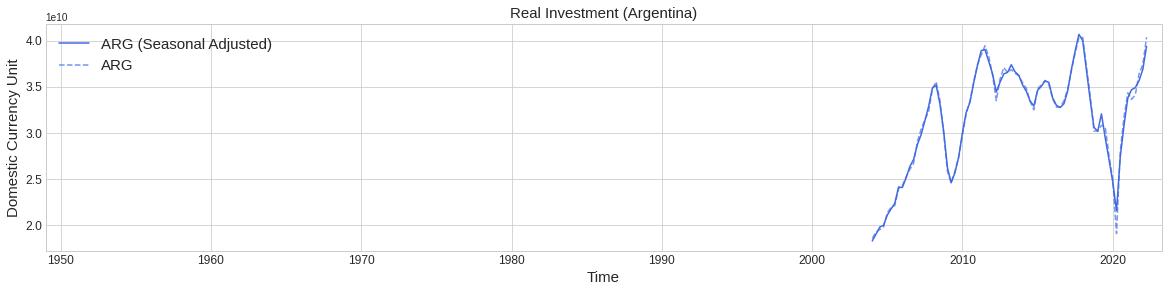

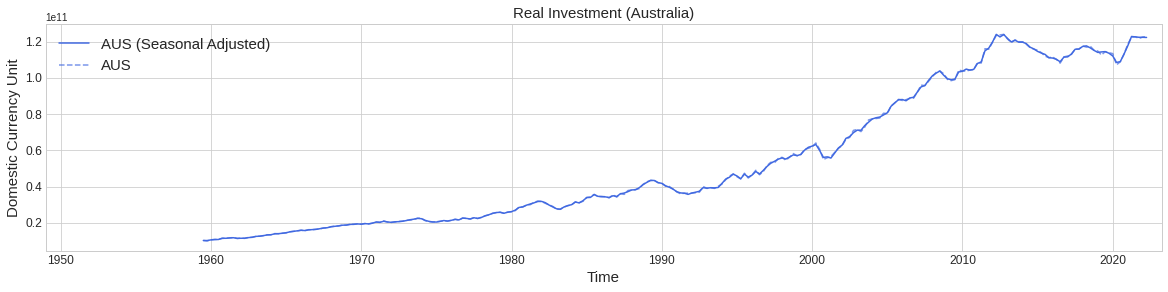

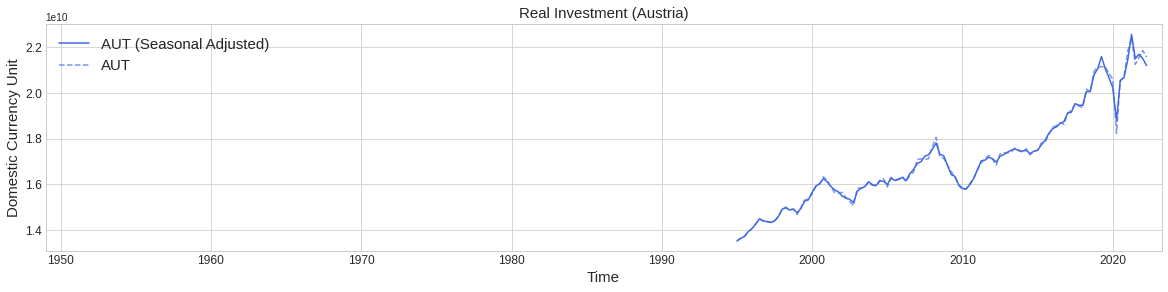

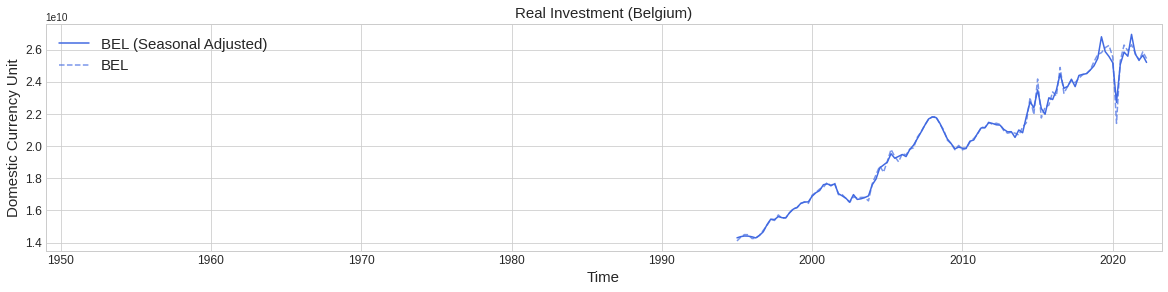

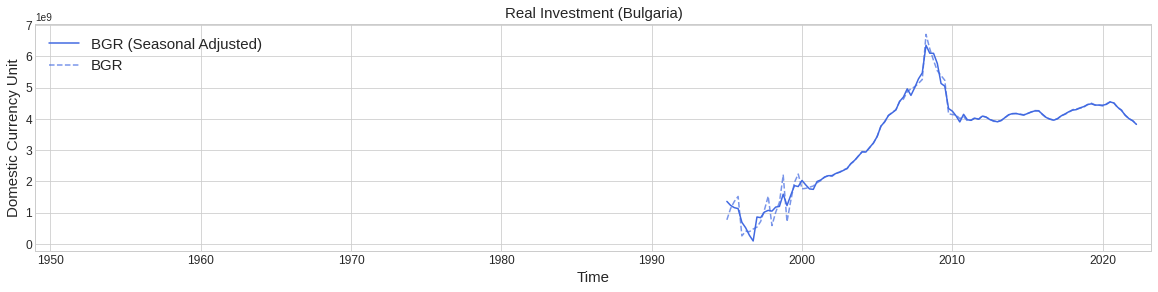

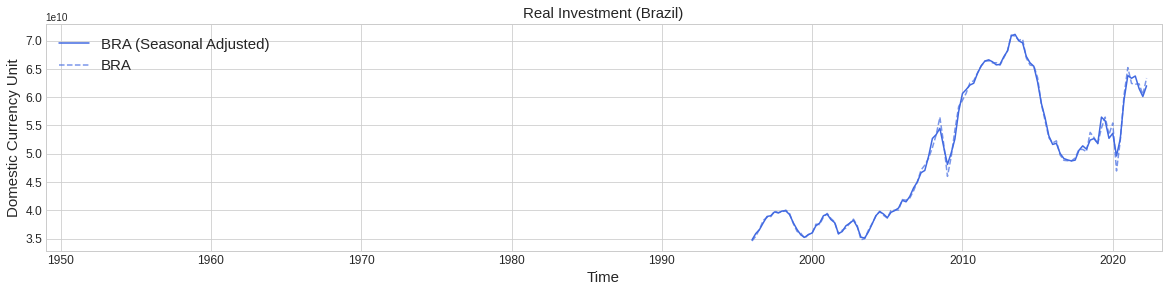

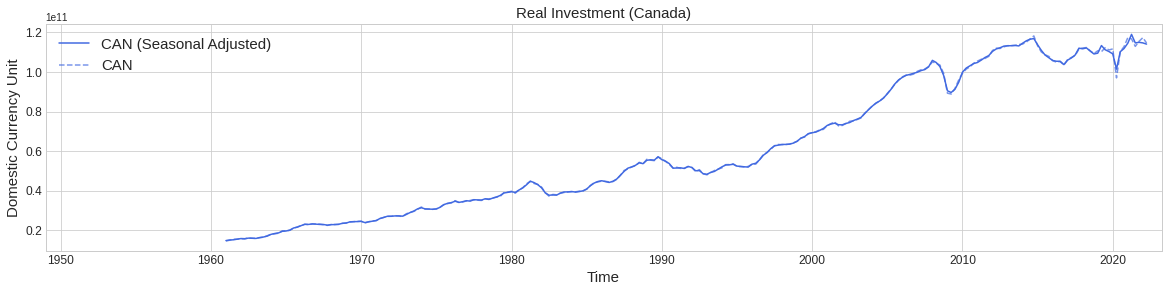

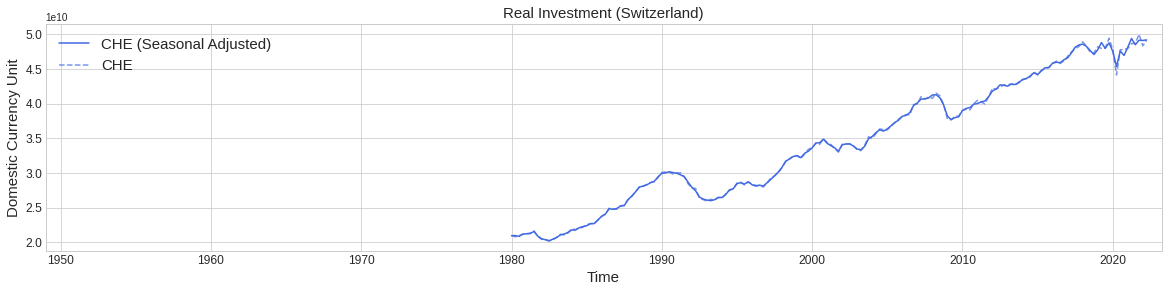

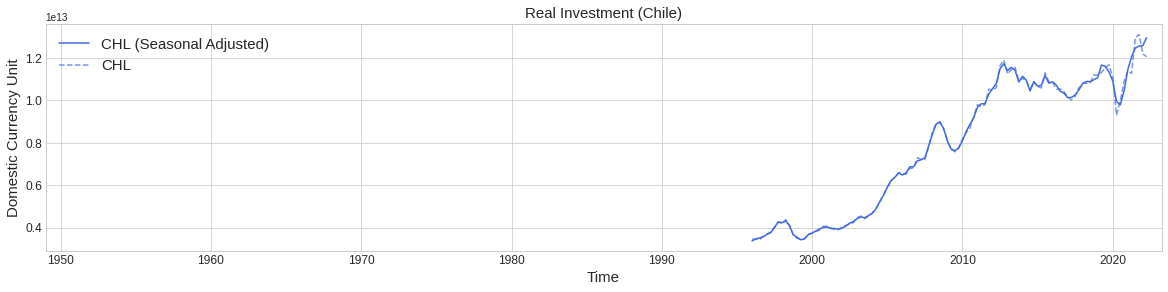

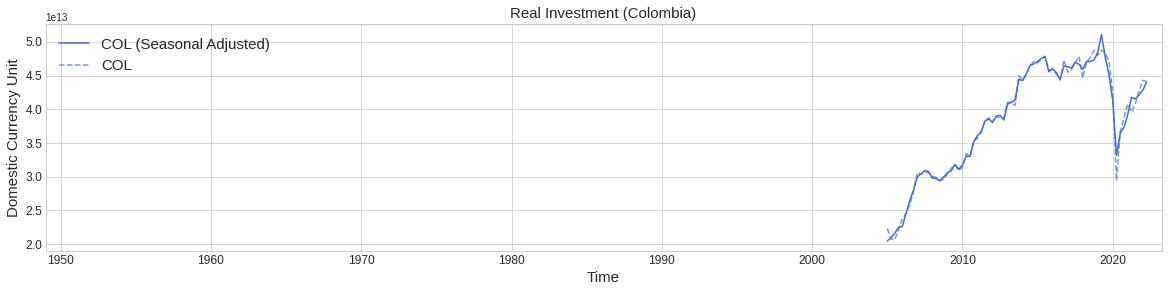

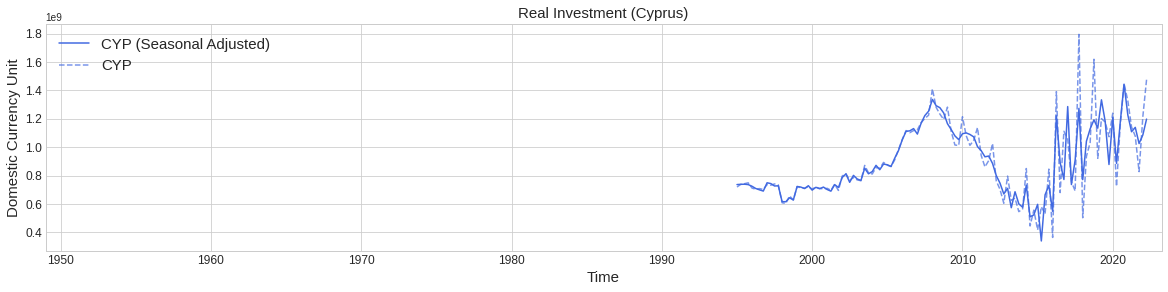

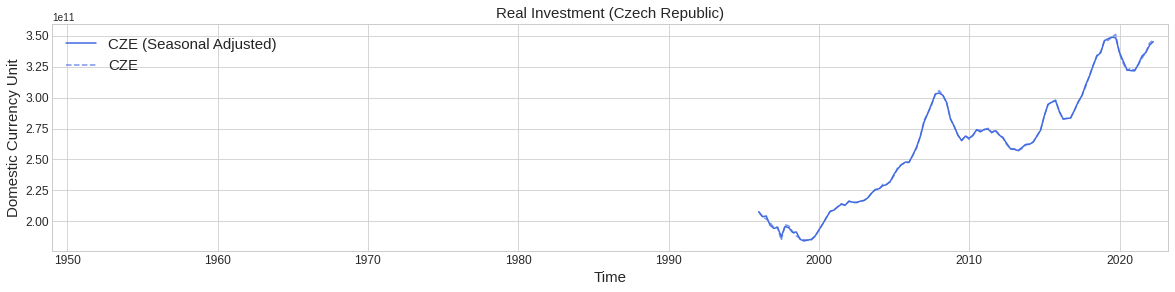

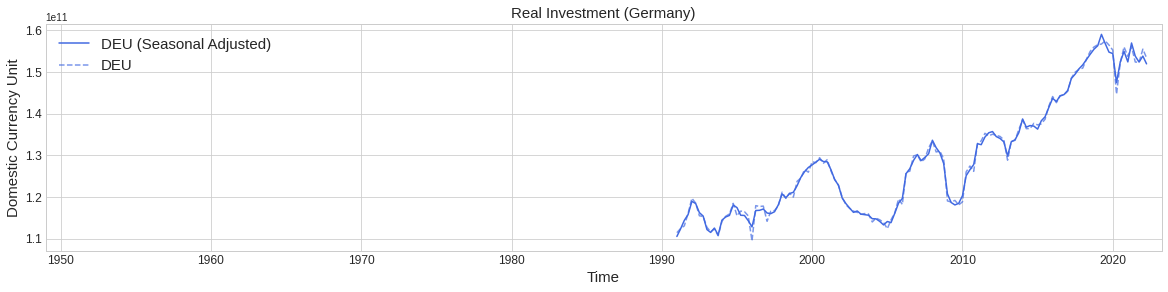

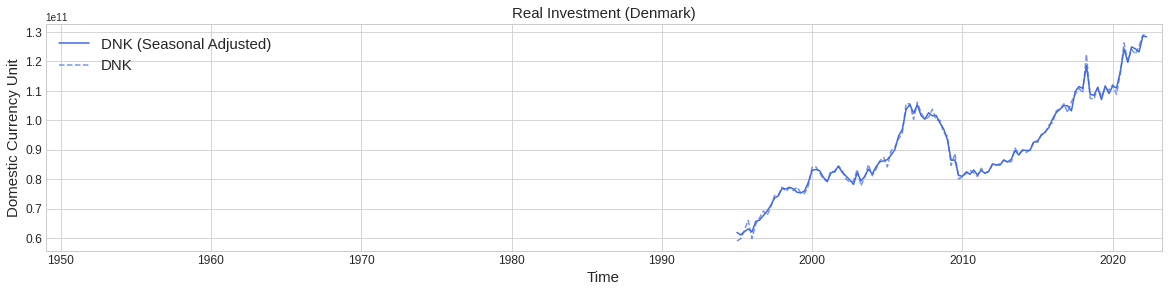

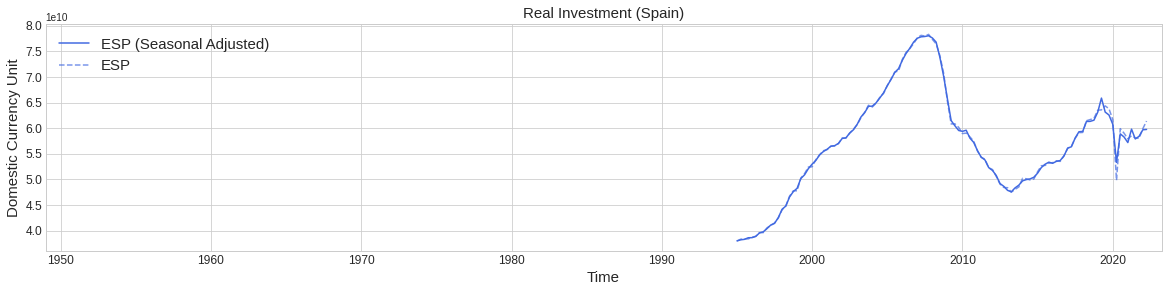

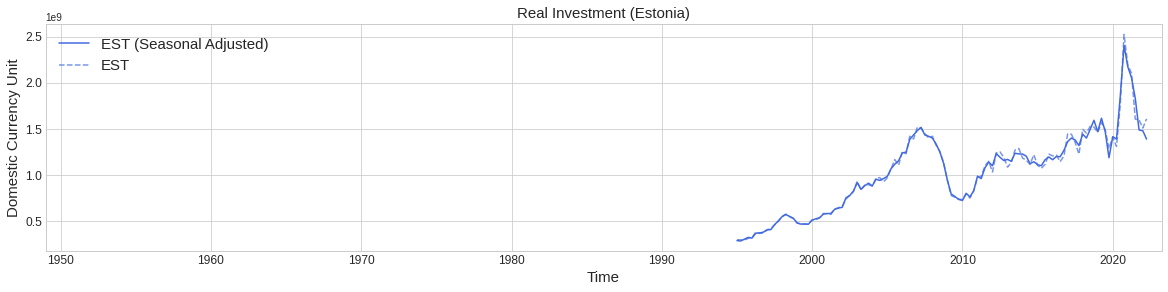

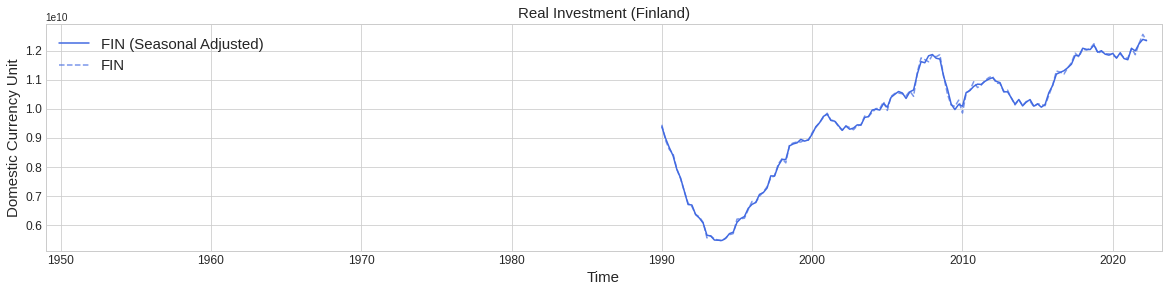

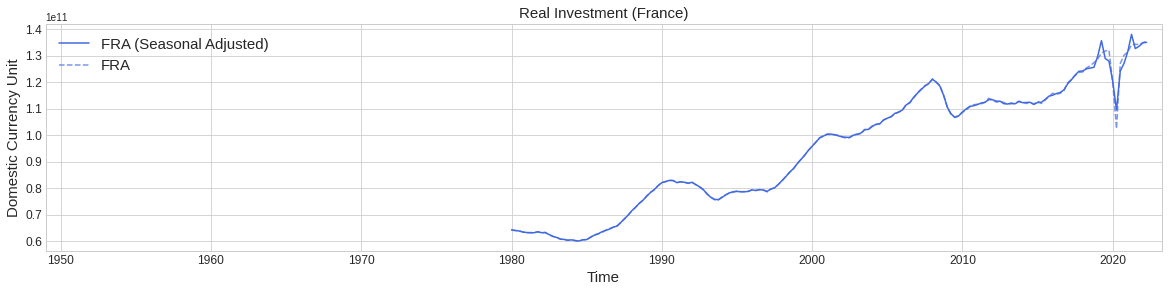

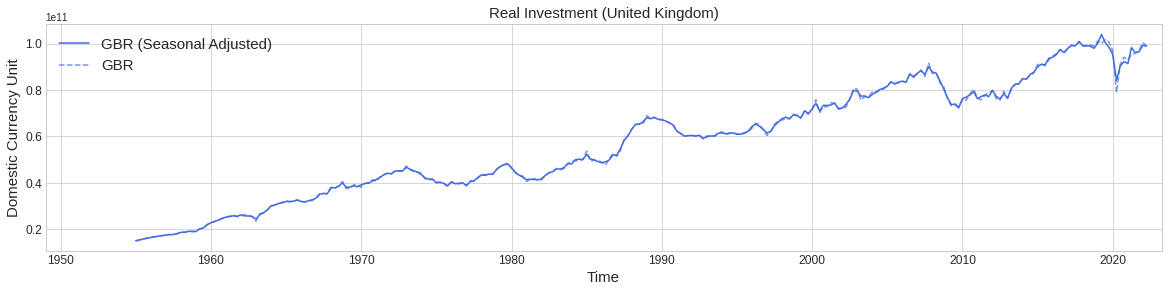

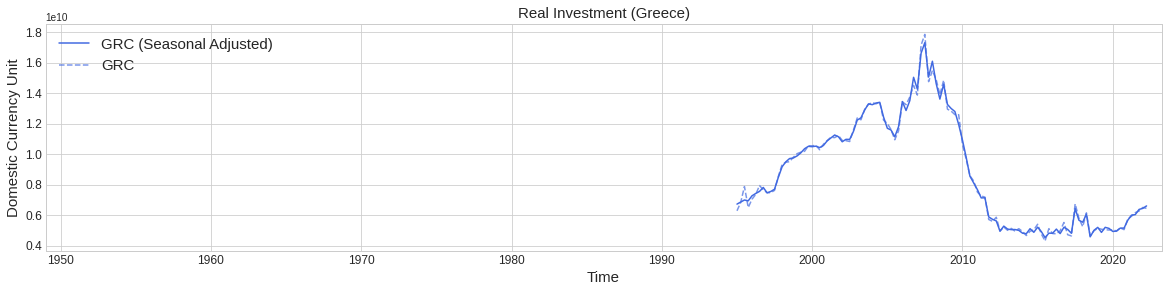

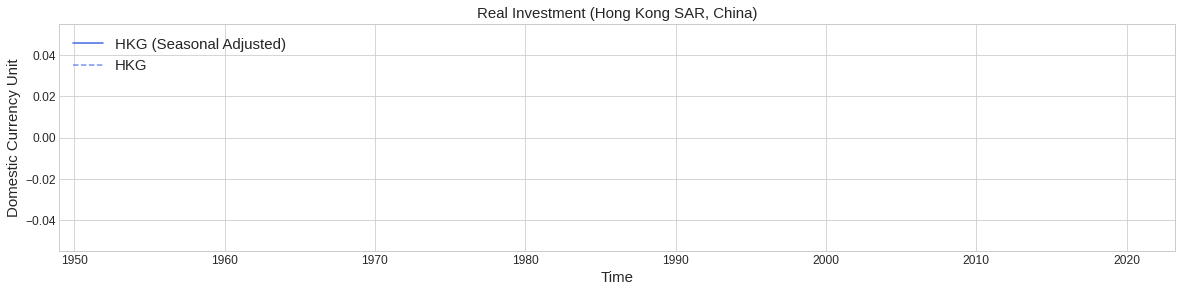

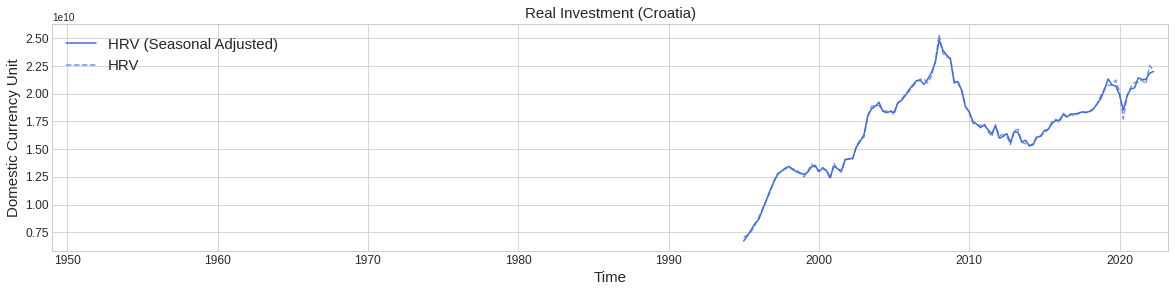

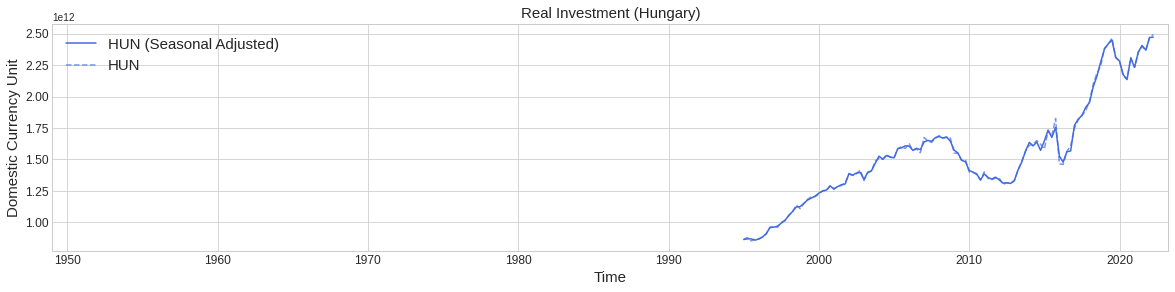

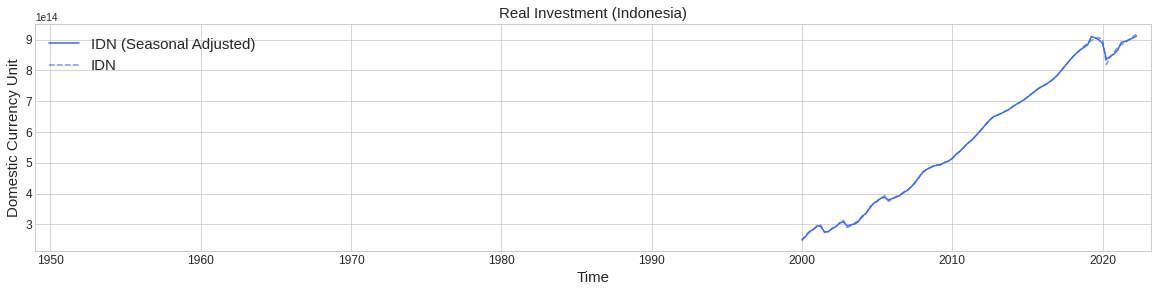

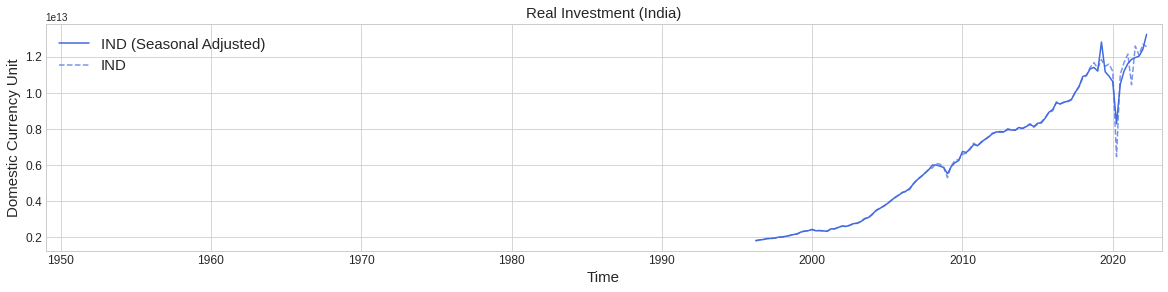

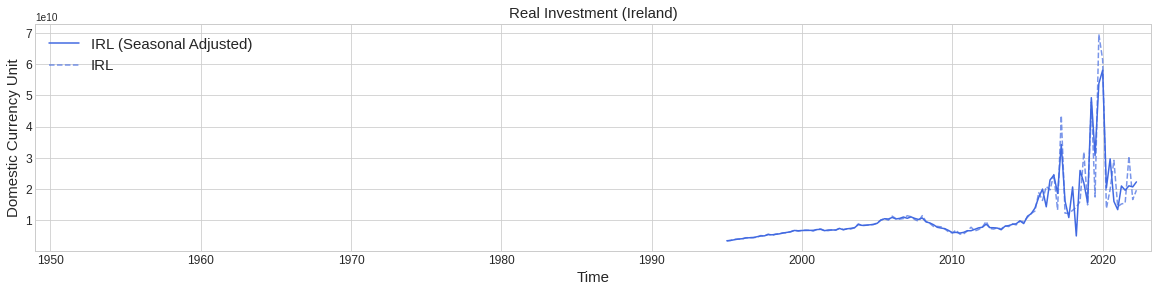

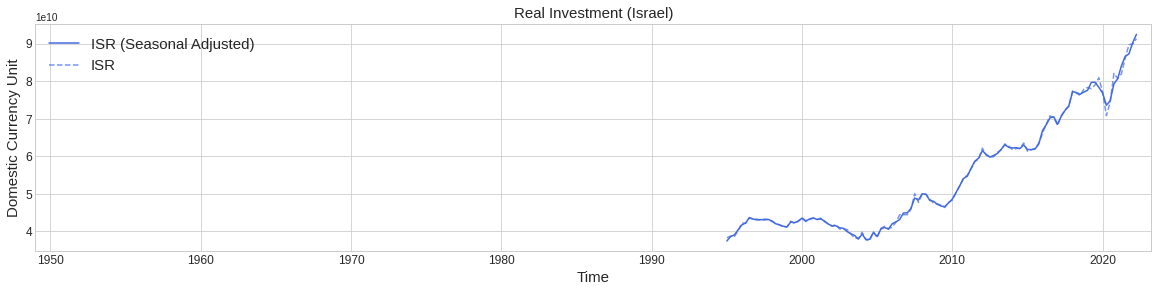

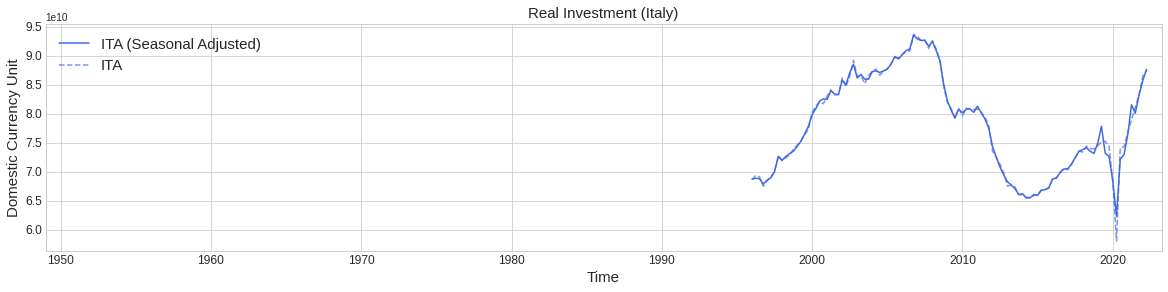

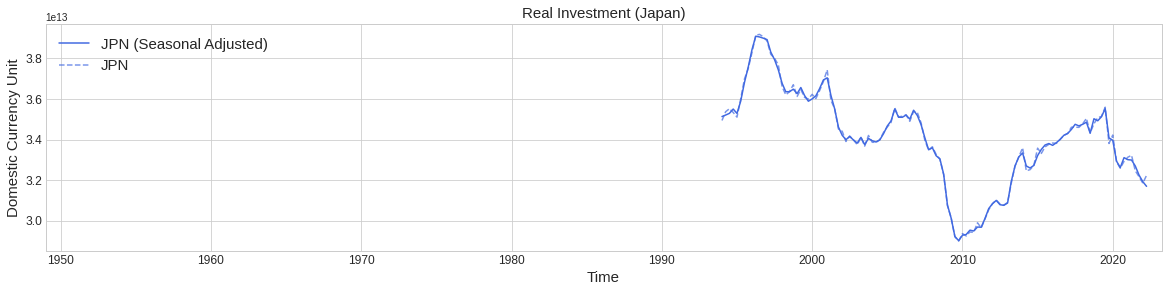

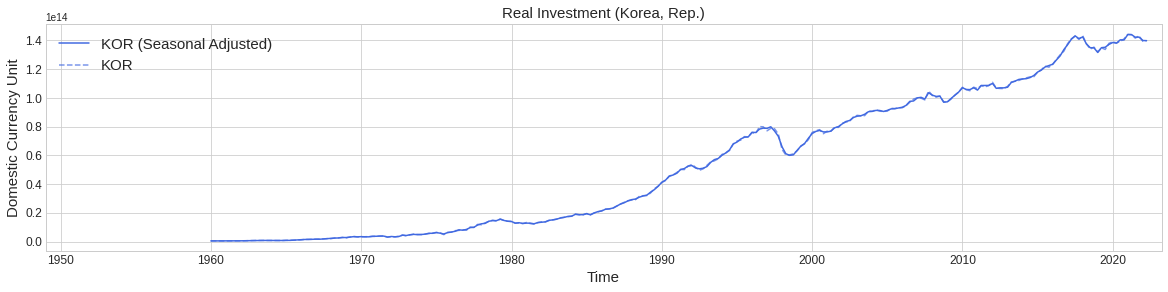

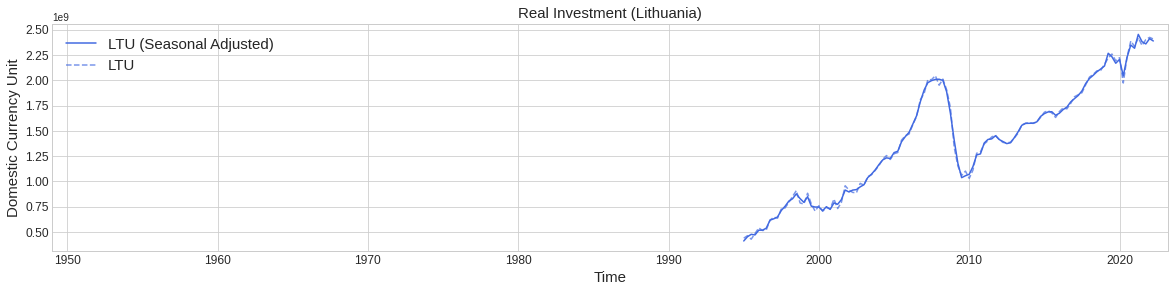

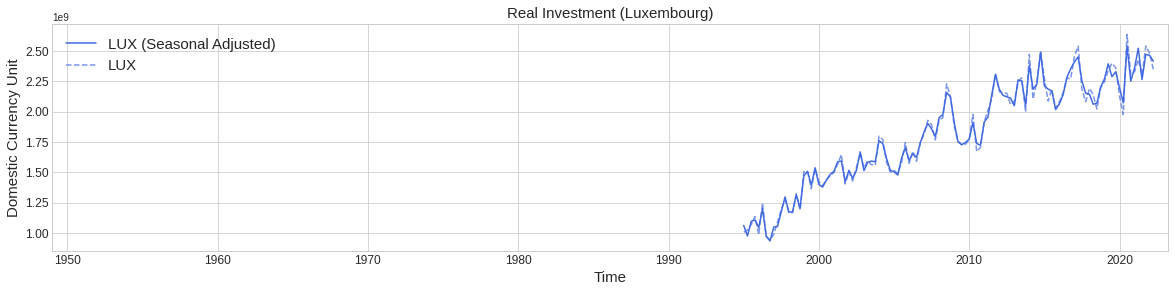

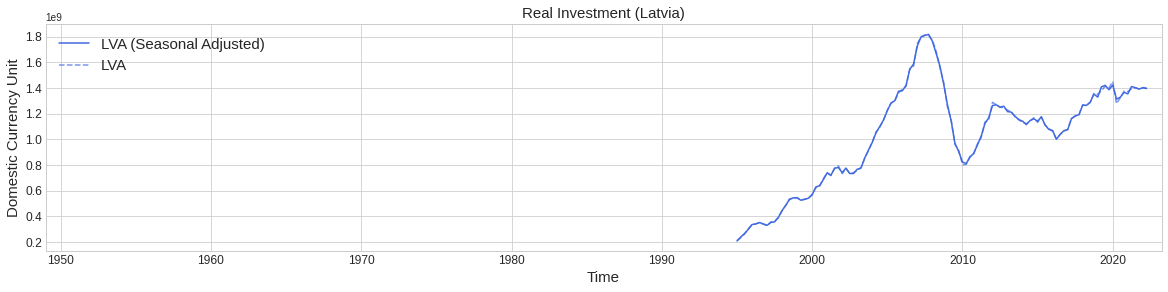

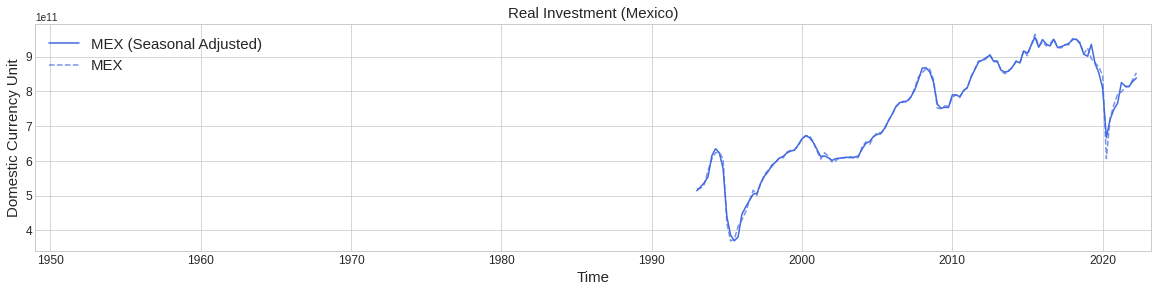

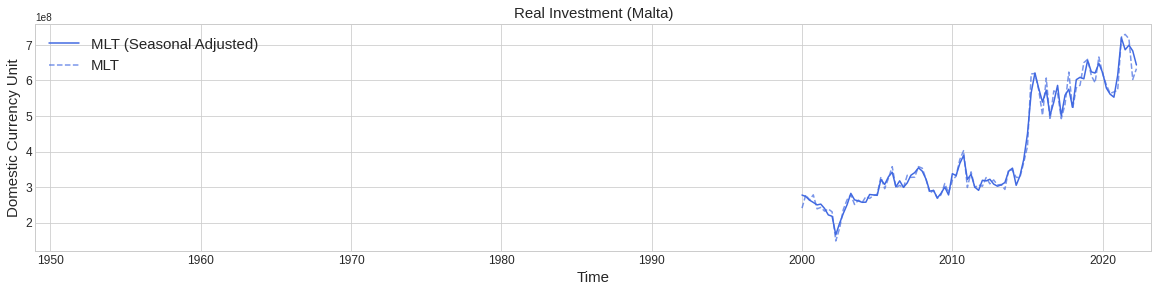

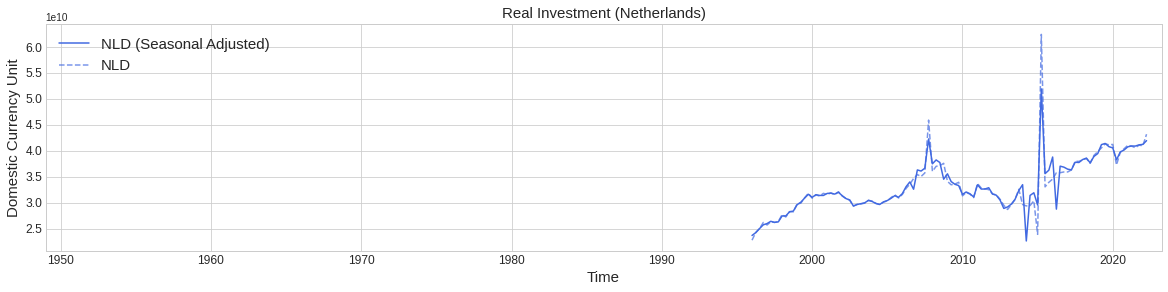

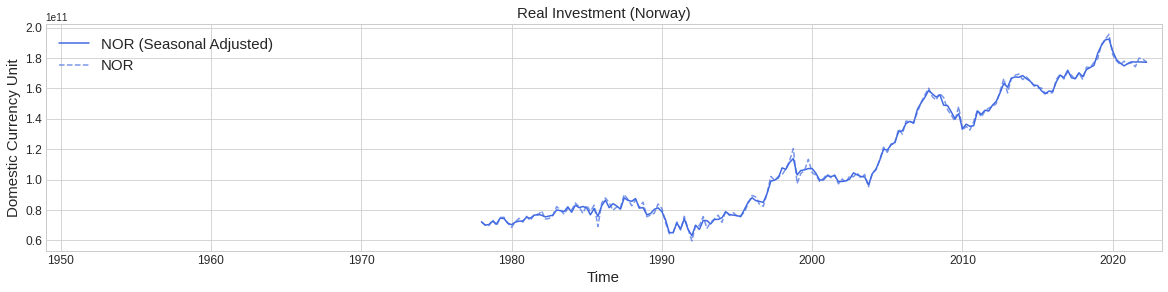

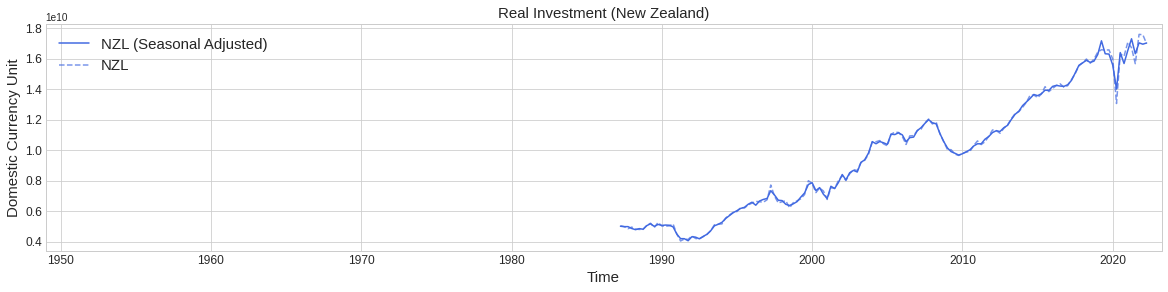

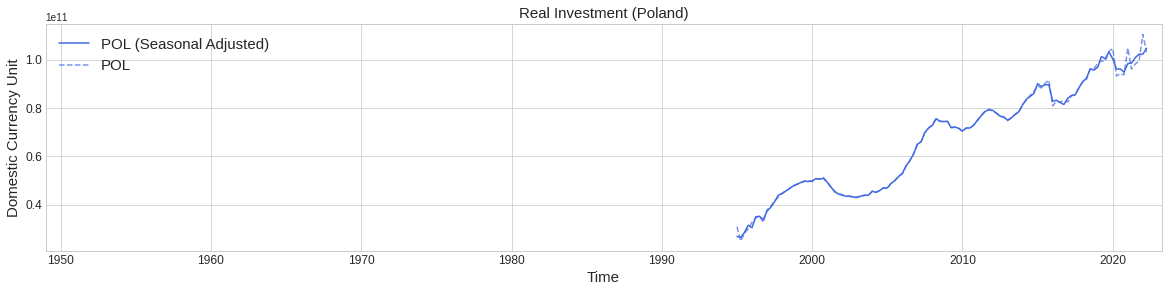

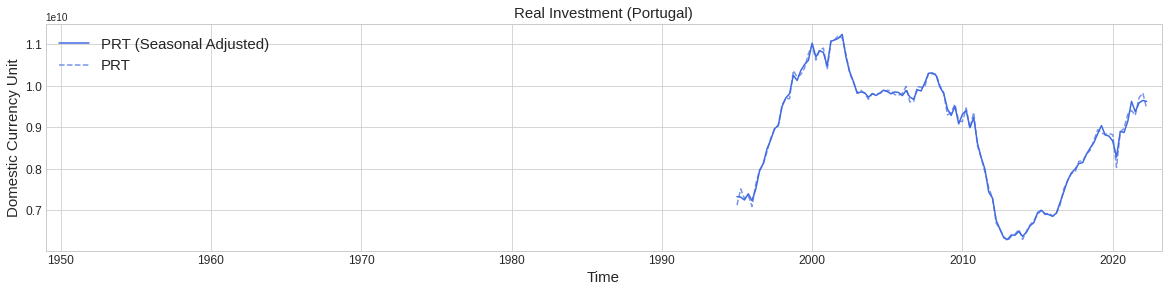

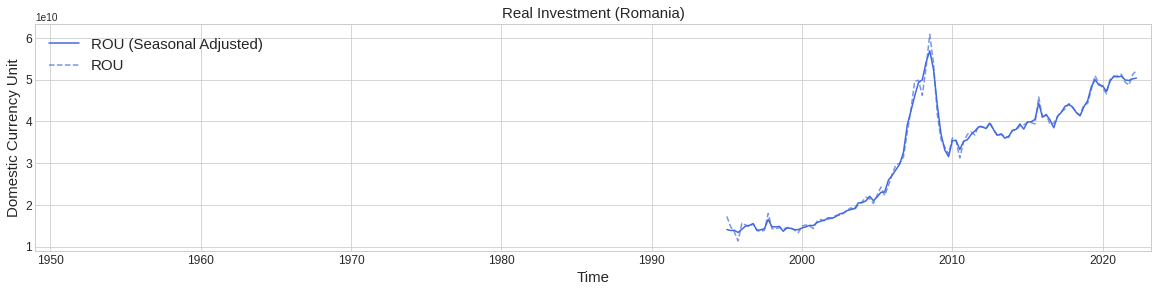

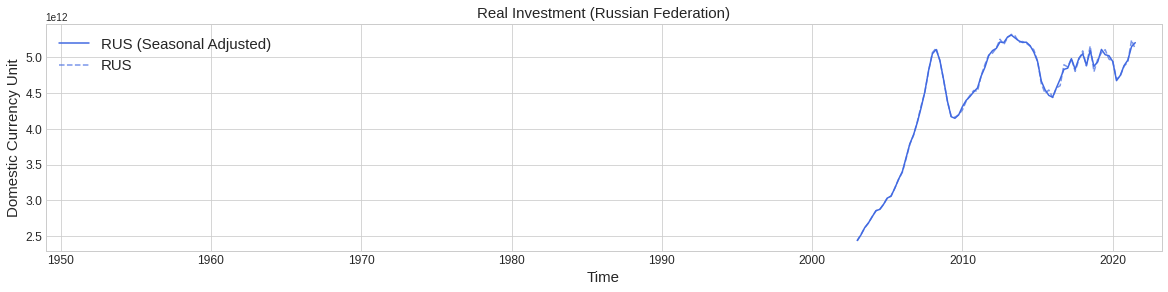

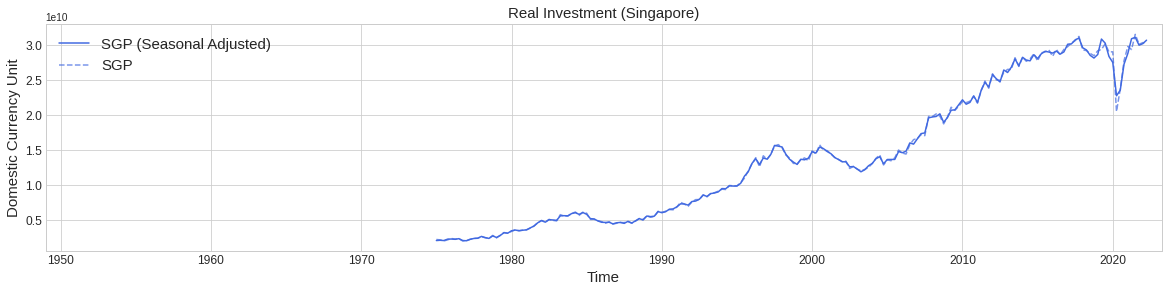

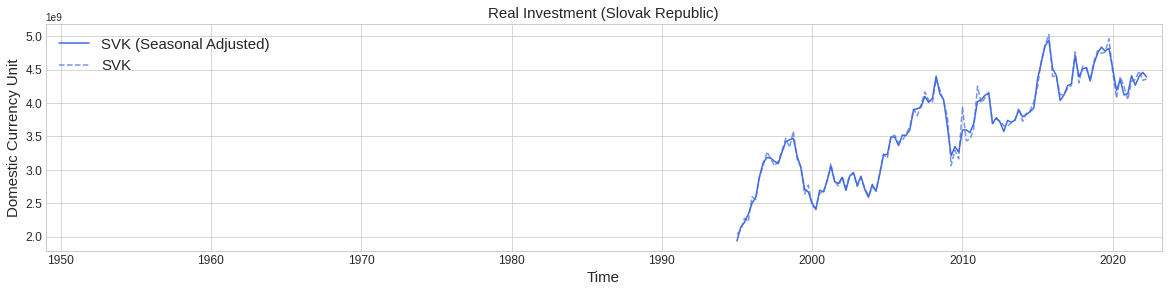

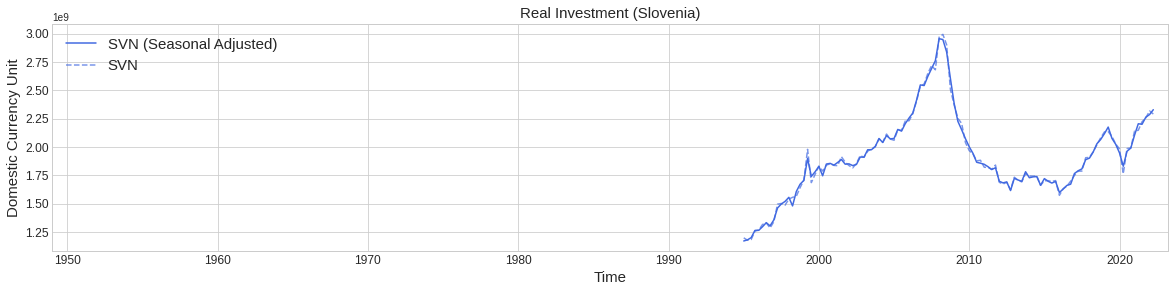

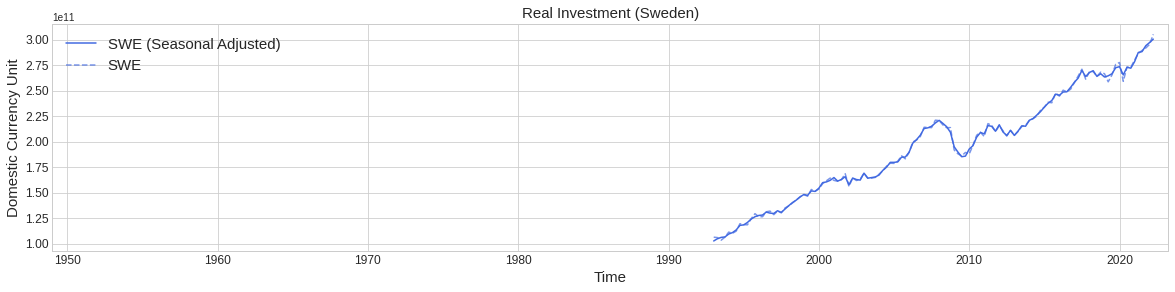

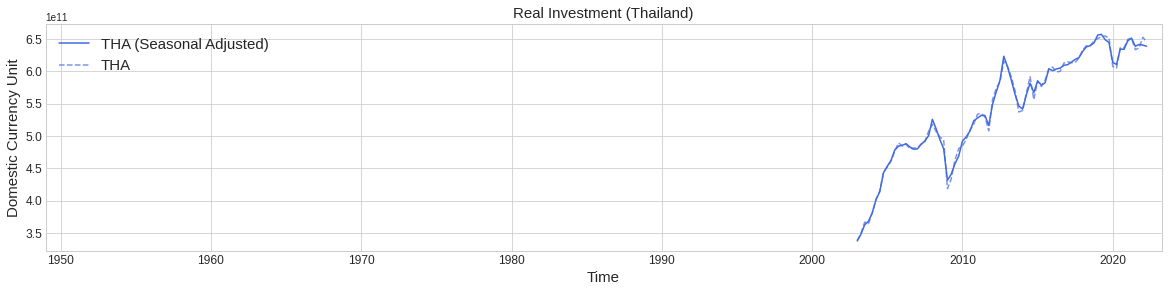

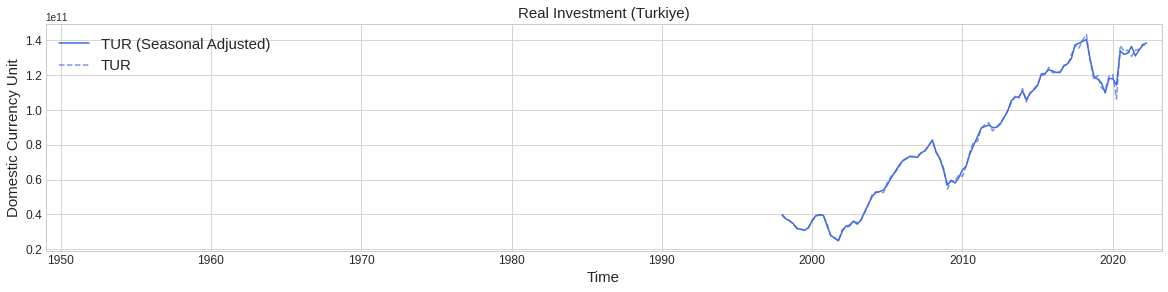

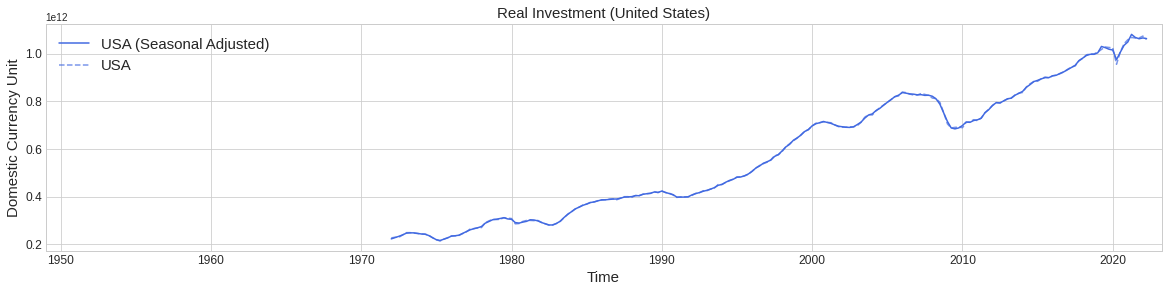

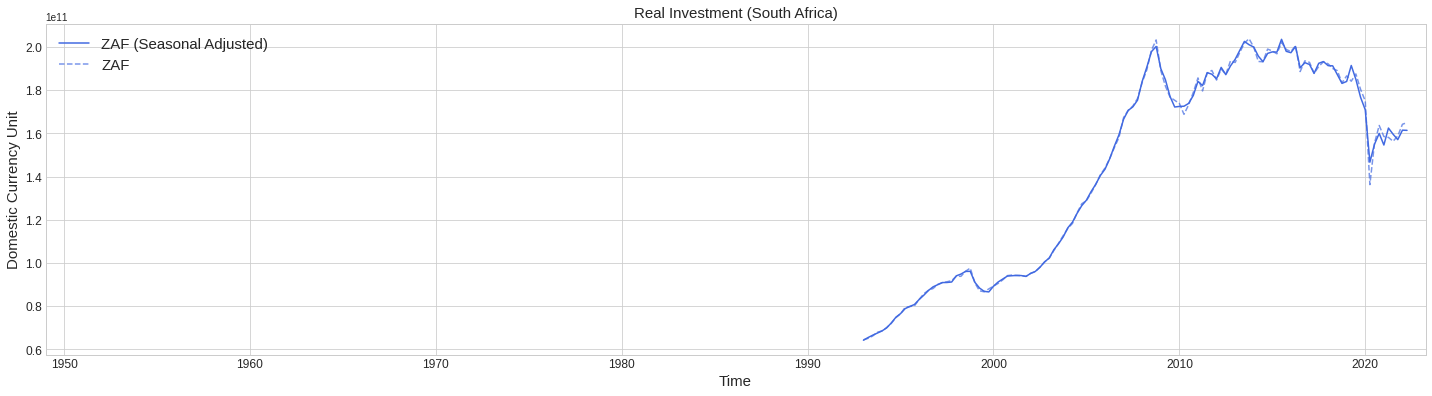

In [22]:
# inv

warnings.filterwarnings(action='ignore')

for i in range(0, data['isocode'].unique().shape[0]):

    plt.figure(figsize=(20, 250)).set_facecolor('white')
    plt.style.use('seaborn-whitegrid')

    plt.subplot(data['isocode'].unique().shape[0], 1, i+1)
    plt.title('Real Investment ({})'.format(data['country'].unique()[i]), fontsize=15)
  
    globals()['cond_isocode{}'.format(i+1)] = (data['isocode'] == data['isocode'].unique()[i])
    globals()['data_isocode{}'.format(i+1)] = data.loc[globals()['cond_isocode{}'.format(i+1)]]
    globals()['data_isocode{}'.format(i+1)]['quarter'] = pd.to_datetime(globals()['data_isocode{}'.format(i+1)]['quarter'])

    plt.plot(globals()['data_isocode{}'.format(i+1)]['quarter'], globals()['data_isocode{}'.format(i+1)]['inv'], label=globals()['data_isocode{}'.format(i+1)]['isocode'].unique()[0] + ' (Seasonal Adjusted)', color='royalblue')

    globals()['cond_temp_isocode{}'.format(i+1)] = (data_temp['isocode'] == data_temp['isocode'].unique()[i])
    globals()['data_temp_isocode{}'.format(i+1)] = data_temp.loc[globals()['cond_temp_isocode{}'.format(i+1)]]
    globals()['data_temp_isocode{}'.format(i+1)]['quarter'] = pd.to_datetime(globals()['data_temp_isocode{}'.format(i+1)]['quarter'])

    plt.plot(globals()['data_temp_isocode{}'.format(i+1)]['quarter'], globals()['data_temp_isocode{}'.format(i+1)]['inv'], label=globals()['data_temp_isocode{}'.format(i+1)]['isocode'].unique()[0], color='royalblue', linestyle='dashed', alpha=0.7)

    plt.xlabel('Time', fontsize=15)
    plt.ylabel('Domestic Currency Unit', fontsize=15)
    plt.xlim([dt.date(1949, 1, 1), dt.date(2023, 4, 1)])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='upper left', ncol=1, fontsize=15)

plt.tight_layout()
# plt.grid()

## **4. export the data**

In [23]:
# quarterly dataset

data['quarter'] = pd.to_datetime(data['quarter'])
data['quarter'] = data['quarter'].dt.to_period('Q')

data = data.sort_values(by=['isocode', 'quarter']).reset_index(drop=True)

data

,country,isocode,quarter,region,income,oecd,g7,tradeopen,finopen_ci,finopen_ci_n,...,fxflex_fine,fxflex_coarse,ggdebt,ggcon,gdp,reer,ca,pcon,cds,inv
0,Argentina,ARG,1950Q1,7,2,NaN,NaN,NaN,NaN,NaN,...,14.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,ARG,1950Q2,7,2,NaN,NaN,NaN,NaN,NaN,...,14.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina,ARG,1950Q3,7,2,NaN,NaN,NaN,NaN,NaN,...,14.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,ARG,1950Q4,7,2,NaN,NaN,NaN,NaN,NaN,...,14.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,ARG,1951Q1,7,2,NaN,NaN,NaN,NaN,NaN,...,14.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14495,South Africa,ZAF,2021Q2,5,2,NaN,NaN,55.22,NaN,NaN,...,NaN,NaN,70.88,223698443352.74,1165743462187.47,80.20,5.04,769625497221.63,187.52,162489762826.93
14496,South Africa,ZAF,2021Q3,5,2,NaN,NaN,57.41,NaN,NaN,...,NaN,NaN,70.73,223959202009.14,1124134900926.21,78.67,2.39,742694325320.05,215.05,159646210344.98
14497,South Africa,ZAF,2021Q4,5,2,NaN,NaN,59.45,NaN,NaN,...,NaN,NaN,71.31,224091595830.67,1125566644987.62,75.72,3.02,746925974429.68,205.51,157134164017.18
14498,South Africa,ZAF,2022Q1,5,2,NaN,NaN,61.19,NaN,NaN,...,NaN,NaN,NaN,225833007897.79,1137366344106.18,76.99,2.61,755775447564.89,211.38,161518383545.74


In [24]:
# export the quarterly data

data.to_excel(excel_writer='data_221115.xlsx')

## **5. references**

* https://data.imf.org/?sk=4c514d48-b6ba-49ed-8ab9-52b0c1a0179b&sId=1409151240976 <br/>
* https://www.worldbank.org/en/research/brief/fiscal-space <br/>
* https://documents1.worldbank.org/curated/en/601211501678994591/pdf/WPS8157.pdf <br/>
* https://www.brookings.edu/research/the-external-wealth-of-nations-database/
<br/>
* https://www.imf.org/en/Publications/WP/Issues/2017/05/10/International-Financial-Integration-in-the-Aftermath-of-the-Global-Financial-Crisis-44906 <br/>
* https://carmenreinhart.com/exchange-rate/# <br/>
* https://data.bloomberg.com/ <br/>